In [1]:
# flag for whether or not to include the episodes where they didn't specifically ask about the JOSS experience
include_not_asked = False

In [2]:
# imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from textwrap import wrap

In [3]:
# make the plots prettier
sns.set_theme(style="white")

In [12]:
# read in and preprocess the data
data = pd.read_csv("josscast_data.csv")

if not include_not_asked:
    data = data[data['JOSS experience Q asked?']==True]

print(str(len(data)) + " episodes to analyze!")

data

11 episodes to analyze!


,Episode,Track,review start,published,review length (days),JOSS experience Q asked?,code review,docs,reproducibility,GitHub,software focus,open review
0,01. Eva Maxfield Brown on Speakerbox,DSAIS,2/7/23,3/21/23,42,True,True,False,False,False,False,True
1,02. Astronomy in the Open,AASS,6/24/22,11/3/22,132,True,True,True,False,False,True,False
2,03. Studying Superbugs,BCM,4/22/23,10/19/23,180,True,True,True,True,True,False,True
3,04. Applying ML to Quantum Monte Carlo Simulat...,BCM,5/17/23,11/21/23,188,True,True,False,False,False,True,False
4,05. Rewrite in Rust,ESE,10/25/23,1/3/24,70,True,False,False,True,False,True,False
5,06. Streamlining Molecular Dynamics,BCM,10/26/23,12/15/23,50,True,True,False,False,True,True,False
6,07. Adding Defect Analysis to the Materials Pr...,PE,10/11/23,1/19/24,100,True,False,False,False,False,False,True
8,09. Reproducibility in Neuroscience,BCM,6/16/23,2/22/24,251,True,False,False,True,True,False,False
9,10. Defect Structure Searching,BCM,10/5/22,12/1/22,57,True,True,False,False,False,True,True
11,12. Text Augmentation for NLP,DSAIS,2/19/24,4/26/24,67,True,False,False,False,False,False,True


In [10]:
# how many times was each key idea mentioned?
ideas = data.columns[6:]
idea_counts = data[ideas].sum()
idea_counts.sort_values(inplace=True, ascending=False)
idea_counts

code review        6
open review        6
software focus     6
GitHub             3
reproducibility    3
docs               2
dtype: int64

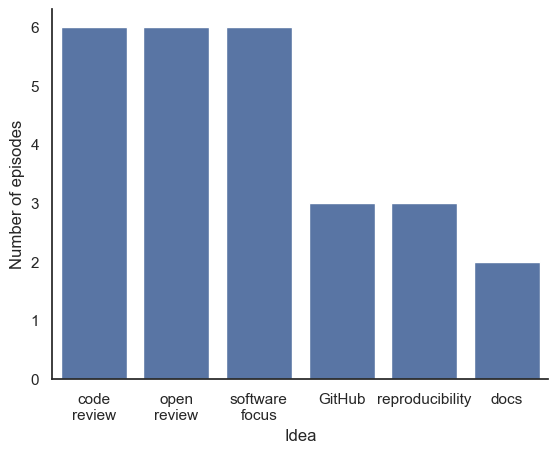

In [15]:
sns.barplot(idea_counts)
xlabels = [text.replace(" ","\n") for text in idea_counts.keys()]
plt.xticks(plt.xticks()[0], xlabels)
plt.ylabel("Number of episodes")
plt.xlabel("Idea")
sns.despine()
plt.savefig("ideas.png")